In [ ]:
# write here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import ISLP as islp

dataset = islp.load_data('C:/Users/sschi/Downloads/ids4/hrDataset')
dataset.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [49]:
dataset['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [ ]:
mapping = {'Travel_Rarely':1, 'Travel_Frequently':2, 'Non-Travel':3}
dataset['BusinessTravel'] = dataset['BusinessTravel'].map(mapping)

In [51]:
dataset['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [ ]:
mapping = {'Single':1, 'Married':2, 'Divorced':3}
dataset['MaritalStatus'] = dataset['MaritalStatus'].map(mapping)

In [53]:
dataset['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [ ]:
mapping = {'Sales Executive':1, 'Research Scientist':2, 'Laboratory Technician':3, 'Manufacturing Director':4, 'Healthcare Representative':5, 'Manager':6, 'Sales Representative':7, 'Research Director':8, 'Human Resources':9}
dataset['JobRole'] = dataset['JobRole'].map(mapping)

In [55]:
dataset['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [ ]:
mapping = {'Sales':1, 'Research & Development':2, 'Human Resources':3}
dataset['Department'] = dataset['Department'].map(mapping)

In [57]:
dataset['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [ ]:
mapping = {'Life Sciences':1, 'Other':2, 'Medical':3, 'Marketing':4, 'Technical Degree':5, 'Human Resources':6}
dataset['EducationField'] = dataset['EducationField'].map(mapping)

In [59]:
dataset['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
mapping = {'Yes':1, 'No':0}
dataset['Attrition'] = dataset['Attrition'].map(mapping)

In [61]:
dataset['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
mapping = {'Female':1, 'Male':2}
dataset['Gender'] = dataset['Gender'].map(mapping)

In [63]:
dataset['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
mapping = {'Yes':1, 'No':0}
dataset['OverTime'] = dataset['OverTime'].map(mapping)

In [65]:
dataset['Over18'].unique()

array(['Y'], dtype=object)

In [66]:
dataset=dataset.drop('Over18', axis=1)

In [67]:
dataset['EmployeeCount'].unique()

array([1], dtype=int64)

In [68]:
dataset=dataset.drop('EmployeeCount', axis=1)

In [69]:
dataset['StandardHours'].unique()

array([80], dtype=int64)

In [70]:
dataset=dataset.drop('StandardHours', axis=1)

In [25]:
dataset.corr()

Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.159205       -0.024751   0.010661   
Attrition                -0.159205   1.000000       -0.000074  -0.056652   
BusinessTravel           -0.024751  -0.000074        1.000000   0.004086   
DailyRate                 0.010661  -0.056652        0.004086   1.000000   
Department                0.031882  -0.063991       -0.009044  -0.007109   
DistanceFromHome         -0.001686   0.077924        0.024469  -0.004985   
Education                 0.208034  -0.031373       -0.000757  -0.016806   
EducationField           -0.007192   0.075437       -0.017799  -0.015942   
EmployeeNumber           -0.010145  -0.010577        0.015578  -0.050990   
EnvironmentSatisfaction   0.010146  -0.103369       -0.004174   0.018355   
Gender                   -0.036311   0.029453        0.032981  -0.011716   
HourlyRate                0.024287  -0.006846       -0.026528   0.023381   
JobInvolvement            0.029820  -0.130016       -0.039062   0.046135   
JobLevel                  0.509604  -0.169105       -0.019311   0.002966   
JobRole                   0.159715  -0.027930       -0.028664  -0.002507   
JobSatisfaction          -0.004892  -0.103481        0.033962   0.030571   
MaritalStatus             0.095029  -0.162070        0.024001   0.069586   
MonthlyIncome             0.497855  -0.159840       -0.034319   0.007707   
MonthlyRate               0.028051   0.015170        0.014107  -0.032182   
NumCompaniesWorked        0.299635   0.043494       -0.020875   0.038153   
OverTime                  0.028062   0.246118       -0.016543   0.009135   
PercentSalaryHike         0.003634  -0.013478        0.029377   0.022704   
PerformanceRating         0.001904   0.002889        0.026341   0.000473   
RelationshipSatisfaction  0.053535  -0.045872        0.035986   0.007846   
StockOptionLevel          0.037510  -0.137145        0.016727   0.042143   
TotalWorkingYears         0.680381  -0.171063       -0.034226   0.014515   
TrainingTimesLastYear    -0.019621  -0.059478       -0.015240   0.002453   
WorkLifeBalance          -0.021490  -0.063939        0.011256  -0.037848   
YearsAtCompany            0.311309  -0.134392        0.014575  -0.034055   
YearsInCurrentRole        0.212901  -0.160545        0.011497   0.009932   
YearsSinceLastPromotion   0.216513  -0.033019        0.032591  -0.033229   
YearsWithCurrManager      0.202089  -0.156199        0.022636  -0.026363   

                          Department  DistanceFromHome  Education  \
Age                         0.031882         -0.001686   0.208034   
Attrition                  -0.063991          0.077924  -0.031373   
BusinessTravel             -0.009044          0.024469  -0.000757   
DailyRate                  -0.007109         -0.004985  -0.016806   
Department                  1.000000         -0.017225  -0.007996   
DistanceFromHome           -0.017225          1.000000   0.021042   
Education                  -0.007996          0.021042   1.000000   
EducationField             -0.057499          0.020004  -0.002687   
EmployeeNumber              0.010895          0.032916   0.042070   
EnvironmentSatisfaction     0.019395         -0.016075  -0.027128   
Gender                      0.041583         -0.001851  -0.016547   
HourlyRate                  0.004144          0.031131   0.016775   
JobInvolvement              0.024586          0.008783   0.042438   
JobLevel                   -0.101963          0.005303   0.101589   
JobRole                     0.425036         -0.043595  -0.019223   
JobSatisfaction            -0.021001         -0.003669  -0.011296   
MaritalStatus               0.056073          0.014437  -0.004053   
MonthlyIncome              -0.053130         -0.017014   0.094961   
MonthlyRate                -0.023642          0.027473  -0.026084   
NumCompaniesWorked          0.035882         -0.029251   0.126317   
OverTime                   -0.007481          0.025514  -0.020322   
Perc

In [72]:
dataset['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

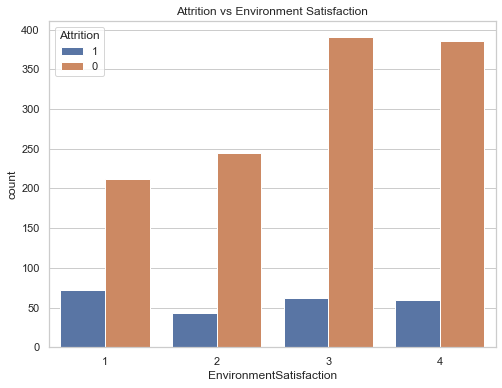

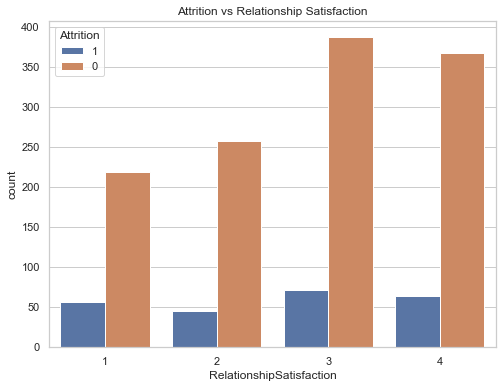

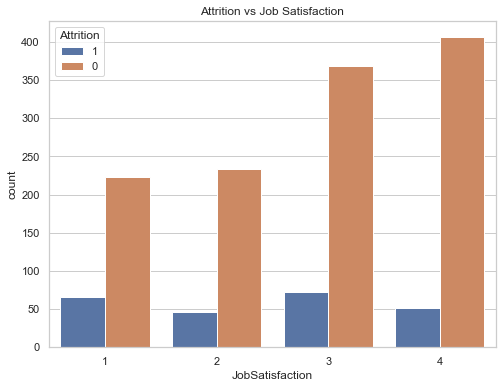

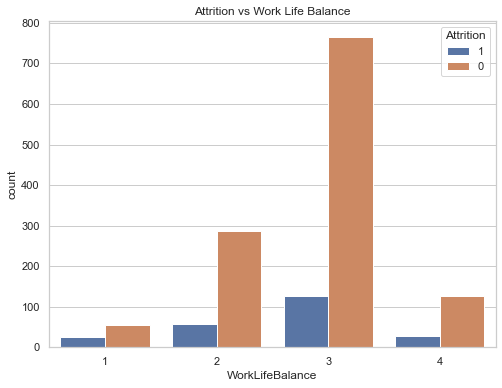

In [ ]:
# Conjecture 1:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

d1=dataset
d1['Attrition']=d1['Attrition'].astype(str)

sns.set(style="whitegrid")

# Plot the relationship between Attrition and Environment Satisfaction
plt.figure(figsize=(8, 6))
sns.countplot(x="EnvironmentSatisfaction", hue="Attrition", data=d1)
plt.title("Attrition vs Environment Satisfaction")
plt.show()

# Plot the relationship between Attrition and Relationship Satisfaction
plt.figure(figsize=(8, 6))
sns.countplot(x="RelationshipSatisfaction", hue="Attrition", data=d1)
plt.title("Attrition vs Relationship Satisfaction")
plt.show()

# Plot the relationship between Attrition and Job Satisfaction
plt.figure(figsize=(8, 6))
sns.countplot(x="JobSatisfaction", hue="Attrition", data=d1)
plt.title("Attrition vs Job Satisfaction")
plt.show()

# Plot the relationship between Attrition and Work Life Balance
plt.figure(figsize=(8, 6))
sns.countplot(x="WorkLifeBalance", hue="Attrition", data=d1)
plt.title("Attrition vs Work Life Balance")
plt.show()

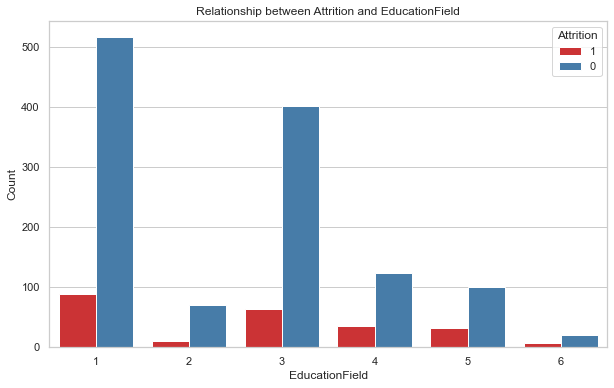

In [33]:
# Conjecture 2
plt.figure(figsize=(10, 6))
sns.countplot(x='EducationField', hue='Attrition', data=dataset, palette='Set1')
plt.title('Relationship between Attrition and EducationField')
plt.xlabel('EducationField')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

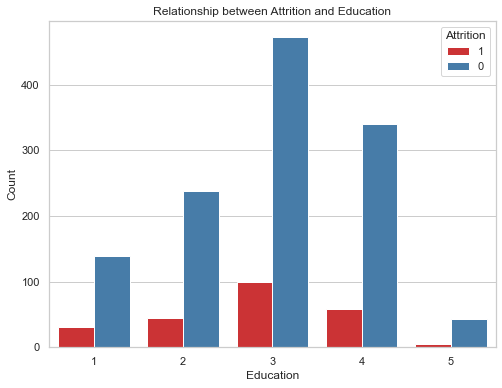

In [35]:
# Conjecture 3
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Attrition', data=dataset, palette='Set1')
plt.title('Relationship between Attrition and Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

C:\Users\sschi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:479: RuntimeWarning: invalid value encountered in subtract
  edges = res[orient].to_numpy() - widths / 2
C:\Users\sschi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:496: RuntimeWarning: invalid value encountered in multiply
  edges = edges + (1 - shrink) / 2 * widths
C:\Users\sschi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:479: RuntimeWarning: invalid value encountered in subtract
  edges = res[orient].to_numpy() - widths / 2
C:\Users\sschi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:496: RuntimeWarning: invalid value encountered in multiply
  edges = edges + (1 - shrink) / 2 * widths
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


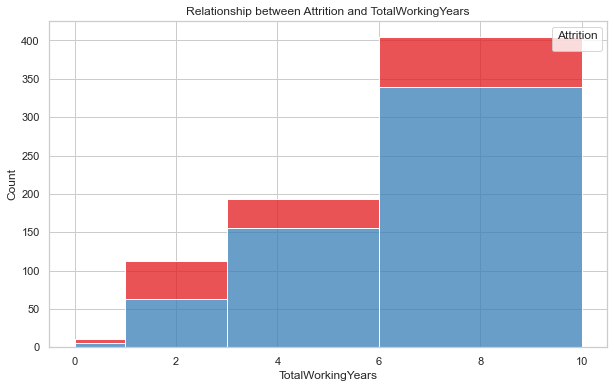

C:\Users\sschi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:479: RuntimeWarning: invalid value encountered in subtract
  edges = res[orient].to_numpy() - widths / 2
C:\Users\sschi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:496: RuntimeWarning: invalid value encountered in multiply
  edges = edges + (1 - shrink) / 2 * widths
C:\Users\sschi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:479: RuntimeWarning: invalid value encountered in subtract
  edges = res[orient].to_numpy() - widths / 2
C:\Users\sschi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:496: RuntimeWarning: invalid value encountered in multiply
  edges = edges + (1 - shrink) / 2 * widths
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


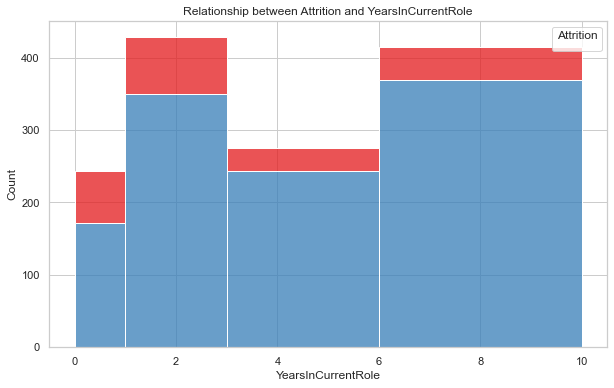

In [41]:
# Conjecture 4
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='TotalWorkingYears', hue='Attrition', bins=[0, 1, 3, 6, 10, float('inf')], multiple='stack', palette='Set1')
plt.title('Relationship between Attrition and TotalWorkingYears')
plt.xlabel('TotalWorkingYears')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='YearsInCurrentRole', hue='Attrition', bins=[0, 1, 3, 6, 10, float('inf')], multiple='stack', palette='Set1')
plt.title('Relationship between Attrition and YearsInCurrentRole')
plt.xlabel('YearsInCurrentRole')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

In [ ]:
correlation_matrix = dataset.corr()

columns_with_high_corr = correlation_matrix['Attrition'][correlation_matrix['Attrition'] > 0.1]
for column, correlation_value in columns_with_high_corr.items():
    print("column: ", column, ", correlation_value: ", correlation_value)

column:  Attrition , correlation_value:  1.0
column:  OverTime , correlation_value:  0.24611799424580436


In [ ]:
import pandas as pd
import numpy as np

data = {'Attrition': np.random.choice([0, 1], size=460, p=[0.5, 0.5])}

old_df = dataset
new_df_1 = old_df[old_df['Attrition'] == 1].sample(frac=1).reset_index(drop=True).head(237)
new_df_0 = old_df[old_df['Attrition'] == 0].sample(frac=1).reset_index(drop=True).head(350)
new_df = pd.concat([new_df_1, new_df_0], ignore_index=True)
new_df.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   46          1               1       1254           1                10   
1   35          1               1        763           1                15   
2   28          1               1        529           2                 2   
3   33          1               2       1076           2                 3   
4   28          1               1        103           2                24   

   Education  EducationField  EmployeeNumber  EnvironmentSatisfaction  ...  \
0          3               1            1869                        3  ...   
1          2               3            1645                        1  ...   
2          4               1             364                        1  ...   
3          3               1             702                        1  ...   
4          3               1              19                        3  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  4                         3                 3   
1                  3                         4                 2   
2                  3                         3                 0   
3                  3                         1                 0   
4                  3                         2                 0   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                 14                      2                3               8   
1                  7                      2                2               2   
2                  5                      5                1               0   
3                 10                      3                3              10   
4                  6                      4                3               4   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   7                        0                     7  
1                   2                        2                     2  
2                   0                        0                     0  
3                   8                        9                     7  
4                   2                        0                     3  

[5 rows x 32 columns]

In [75]:
new_df['Attrition'].value_counts()

0    350
1    237
Name: Attrition, dtype: int64

In [ ]:
correlation_matrix = new_df.corr()
columns_with_high_corr = correlation_matrix['Attrition'][correlation_matrix['Attrition'] > 0.05]

for column, correlation_value in columns_with_high_corr.items():
    print("column: ", column, ", correlation_value: ", correlation_value)

column:  Attrition , correlation_value:  1.0
column:  BusinessTravel , correlation_value:  0.051358864043901956
column:  DistanceFromHome , correlation_value:  0.11821410872359742
column:  EducationField , correlation_value:  0.0653339640296333
column:  NumCompaniesWorked , correlation_value:  0.06697563360806057
column:  OverTime , correlation_value:  0.2801323957944167


In [ ]:
# decision tree initial
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X = dataset.drop('Attrition', axis=1)
y = dataset['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print('Accuracy: ', accuracy)
print('\nClassification Report:\n', classification_rep)

Accuracy:  0.7959183673469388

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       255
           1       0.24      0.26      0.25        39

    accuracy                           0.80       294
   macro avg       0.56      0.57      0.57       294
weighted avg       0.80      0.80      0.80       294



In [ ]:
# Decision tree (balanced data)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X = new_df.drop('Attrition', axis=1)
y = new_df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print('Accuracy: ', accuracy)
print('\nClassification Report:\n', classification_rep)

Accuracy:  0.6186440677966102

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.71      0.68        66
           1       0.58      0.50      0.54        52

    accuracy                           0.62       118
   macro avg       0.61      0.61      0.61       118
weighted avg       0.61      0.62      0.61       118



In [ ]:
# Decision tree Grid Search CV

import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

X = new_df.drop('Attrition', axis=1)
y = new_df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring=['f1', 'accuracy'], refit="f1")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Best Hyperparameters: ', best_params)
print('Accuracy: ', accuracy)
print('F1 Score: ', f1)

Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy:  0.652542372881356
F1 Score:  0.5684210526315789


In [ ]:
# Random forest initial

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score

X = dataset.drop('Attrition', axis=1)
y = dataset['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators = 15)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ',accuracy)
f1_rf = f1_score(y_test, y_pred)
print('F1 Score:', f1_rf)

Accuracy:  0.8673469387755102
F1 Score: 0.2040816326530612


In [ ]:
# Random forest (balanced data)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = new_df.drop('Attrition', axis=1)
y = new_df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators = 15)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ',accuracy)
f1_rf = f1_score(y_test, y_pred)
print('F1 Score:', f1_rf)

Accuracy:  0.7542372881355932
F1 Score: 0.6666666666666667


In [ ]:
# Random forest Grid Search CV

import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

X = new_df.drop('Attrition', axis=1)
y = new_df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring=['f1', 'accuracy'], refit="f1")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Best Hyperparameters: ', best_params)
print('Accuracy: ', accuracy)
print('F1 Score: ', f1)

Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy:  0.6949152542372882
F1 Score:  0.5813953488372092


In [173]:
imp_features = model.feature_importances_
cols = new_df.columns[:-1]
imp_features_table = pd.DataFrame({'Feature Name': cols, 'Importance': imp_features})
imp_features_table

Feature Name  Importance
0                        Age    0.062608
1                  Attrition    0.013118
2             BusinessTravel    0.051544
3                  DailyRate    0.014395
4                 Department    0.041797
5           DistanceFromHome    0.015415
6                  Education    0.017688
7             EducationField    0.051931
8             EmployeeNumber    0.049397
9    EnvironmentSatisfaction    0.010449
10                    Gender    0.031540
11                HourlyRate    0.019647
12            JobInvolvement    0.016751
13                  JobLevel    0.037638
14                   JobRole    0.038016
15           JobSatisfaction    0.021252
16             MaritalStatus    0.077720
17             MonthlyIncome    0.057974
18               MonthlyRate    0.025482
19        NumCompaniesWorked    0.030245
20                  OverTime    0.036114
21         PercentSalaryHike    0.005594
22         PerformanceRating    0.022482
23  RelationshipSatisfaction    0.024012
24          StockOptionLevel    0.069075
25         TotalWorkingYears    0.026669
26     TrainingTimesLastYear    0.018911
27           WorkLifeBalance    0.041181
28            YearsAtCompany    0.027258
29        YearsInCurrentRole    0.021863
30   YearsSinceLastPromotion    0.022234

In [ ]:
# Xgboost initial

import xgboost as xgb
from sklearn.metrics import f1_score

X = dataset.drop('Attrition', axis=1) 
y = dataset['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',  # for binary classification
    'eval_metric': 'logloss',         # log loss for binary classification
    'max_depth': 3,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

num_round = 100
model = xgb.train(params, dtrain, num_round)
y_pred = model.predict(dtest)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

accuracy = accuracy_score(y_test, y_pred_binary)
print('Accuracy: ',accuracy)
f1_xgb = f1_score(y_test, y_pred_binary)
print('F1 Score:', f1_xgb)

Accuracy:  0.8877551020408163
F1 Score: 0.3773584905660377


In [ ]:
# Xgboost (balanced data)

import xgboost as xgb
from sklearn.metrics import f1_score

X = new_df.drop('Attrition', axis=1)  
y = new_df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',  # for binary classification
    'eval_metric': 'logloss',         # log loss for binary classification
    'max_depth': 3,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

num_round = 100
model = xgb.train(params, dtrain, num_round)
y_pred = model.predict(dtest)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

accuracy = accuracy_score(y_test, y_pred_binary)
print('Accuracy: ',accuracy)
f1_xgb = f1_score(y_test, y_pred_binary)
print('F1 Score:', f1_xgb)

Accuracy:  0.8305084745762712
F1 Score: 0.803921568627451


In [ ]:
# Xgboost Grid Search CV

from sklearn.model_selection import GridSearchCV
model = xgb.XGBClassifier()

param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.6, 0.7, 0.8, 1],
    'n_estimators': [50, 100, 200],
    'colsample_bytree': [0.1, 0.2, 0.3],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring=['f1','accuracy'],refit="f1")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Best Hyperparameters: ', best_params)
print('Accuracy: ', accuracy)

Best Hyperparameters:  {'colsample_bytree': 0.2, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}
Accuracy:  0.7372881355932204


In [ ]:
# Logistic regression initial

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = dataset.drop('Attrition', axis=1)
y = dataset['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=7000,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print('Accuracy: ',accuracy)
print('\nClassification Report:\n', classification_rep)

Accuracy:  0.8707482993197279

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       255
           1       0.53      0.21      0.30        39

    accuracy                           0.87       294
   macro avg       0.71      0.59      0.61       294
weighted avg       0.84      0.87      0.84       294



In [ ]:
# Logistic regression (balanced data) 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = new_df.drop('Attrition', axis=1)
y = new_df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=7000,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print('Accuracy: ',accuracy)
print('\nClassification Report:\n', classification_rep)

Accuracy:  0.7711864406779662

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81        66
           1       0.78      0.67      0.72        52

    accuracy                           0.77       118
   macro avg       0.77      0.76      0.76       118
weighted avg       0.77      0.77      0.77       118

